# Wealth of Nations — Analysis

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

from won.config import DEFAULT_INDICATORS
from won.data import fetch_many
from won.transform import latest_complete, correlation_matrix
from won.viz import timeseries, scatter_rel, choropleth_latest

In [2]:
panel = fetch_many(DEFAULT_INDICATORS, date="1960:2023")
panel.head()

,iso3c,country,year,gdp_pc,life_exp,health_pc,u5_mort
0,ABW,Aruba,1960,NaN,64.049,NaN,NaN
1,ABW,Aruba,1961,NaN,64.215,NaN,NaN
2,ABW,Aruba,1962,NaN,64.602,NaN,NaN
3,ABW,Aruba,1963,NaN,64.944,NaN,NaN
4,ABW,Aruba,1964,NaN,65.303,NaN,NaN


In [3]:
latest = latest_complete(panel, min_cols=2)
latest.head()

,iso3c,year,country,gdp_pc,life_exp,health_pc,u5_mort
0,ABW,2023,Aruba,33984.790620,76.353000,NaN,NaN
1,AFE,2023,Africa Eastern and Southern,1510.742951,65.146291,NaN,53.806252
2,AFG,2023,Afghanistan,413.757895,66.035000,NaN,55.500000
3,AFW,2023,Africa Western and Central,1599.392983,58.855722,NaN,88.726335
4,AGO,2023,Angola,2309.534130,64.617000,NaN,64.000000


In [4]:
corr = correlation_matrix(latest)
corr

,gdp_pc,life_exp,health_pc,u5_mort
gdp_pc,1.000000,0.621645,0.895292,-0.453008
life_exp,0.621645,1.000000,0.665794,-0.888647
health_pc,0.895292,0.665794,1.000000,-0.575271
u5_mort,-0.453008,-0.888647,-0.575271,1.000000


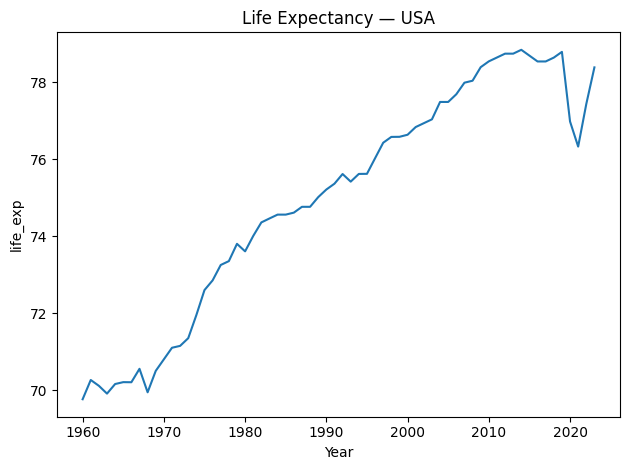

In [9]:
timeseries(panel, iso3c="USA", y="life_exp", title="Life Expectancy — USA")

In [6]:
fig = scatter_rel(latest, x="gdp_pc", y="life_exp",
                  title="Life Expectancy vs GDP per Capita (latest complete)")
fig.show()

In [8]:
map_col = "life_exp"
d = panel[["iso3c", "country", "year", map_col]].dropna(subset=[map_col])
idx = d.groupby("iso3c")["year"].idxmax()
map_df = d.loc[idx].reset_index(drop=True)

fig_map = choropleth_latest(map_df, value_col=map_col,
                             title="Life Expectancy (latest available)")
fig_map.show()